In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime
import warnings
import os

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
sns.set_palette('viridis')

In [2]:
# file path
filename = os.path.join('./data/', 'final_data.csv')
filename

'./data/final_data.csv'

In [3]:
# loading the data
df = pd.read_csv(filename)
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [4]:
# shape of the data
df.shape

(3818004, 12)

In [5]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bikeid             int64  
 4   tripduration       object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
dtypes: float64(1), int64(4), object(7)
memory usage: 349.5+ MB


***Converting columns to their correct datatypes:***

In [6]:
# converting start and end times to pandas datetime objects
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [7]:
# replacing ',' in tripduration and converting to float
# df['tripduration'] = df['tripduration'].str.replace(',', '')
# df['tripduration'] = df['tripduration'].astype(float, errors='raise')
df['tripduration'] = (df.end_time - df.start_time).dt.total_seconds()
df['tripduration_minutes'] = df['tripduration'] / 60.0

***Adding additional Features:***

In [8]:
# extracting features like Year, Month, Week, Day
df['year'] = df['start_time'].dt.year
df['month'] = df['start_time'].dt.month_name()
df['day'] = df['start_time'].dt.day_name()
df['day_of_month'] = df['start_time'].dt.day
df['quarter'] = df['start_time'].dt.quarter

In [9]:
# creating feature is_weekend
def is_weekend(day):
    if day == 'Saturday' or day == 'Sunday':
        return 1
    else:
        return 0
    
df['is_weekend'] = df['day'].apply(is_weekend)

In [10]:
# creating an age column
current_year = np.float(datetime.now().year)
df['age'] = current_year - df['birthyear']

In [11]:
# creating a feature for the time of the day - early morning, morning, afternoon, evening, night
part_of_day_mapping = {
    1: 'late night',
    2: 'early morning',
    3: 'morning',
    4: 'afternoon', 
    5: 'evening',
    6: 'night'
}

df['period'] = (df['start_time'].dt.hour % 24 + 4) // 4
df['period'].replace(part_of_day_mapping, inplace=True)

In [12]:
# creating hour of day feature
df['hour_of_day'] = df['start_time'].dt.hour

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   trip_id               int64         
 1   start_time            datetime64[ns]
 2   end_time              datetime64[ns]
 3   bikeid                int64         
 4   tripduration          float64       
 5   from_station_id       int64         
 6   from_station_name     object        
 7   to_station_id         int64         
 8   to_station_name       object        
 9   usertype              object        
 10  gender                object        
 11  birthyear             float64       
 12  tripduration_minutes  float64       
 13  year                  int64         
 14  month                 object        
 15  day                   object        
 16  day_of_month          int64         
 17  quarter               int64         
 18  is_weekend            int64         
 19  

In [14]:
df.head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,tripduration_minutes,year,month,day,day_of_month,quarter,is_weekend,age,period,hour_of_day
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,...,6.500000,2019,January,Tuesday,1,1,0,33.0,late night,0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,...,7.350000,2019,January,Tuesday,1,1,0,32.0,late night,0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,...,13.816667,2019,January,Tuesday,1,1,0,28.0,late night,0


## Cleaning The Data:

In [15]:
# statistical summary of the data:
pd.set_option('display.float_format', '{:.6f}'.format)
df[['tripduration', 'age', 'birthyear']].describe()

,tripduration,age,birthyear
count,3818004.000000,3279253.000000,3279253.000000
mean,1450.451398,37.925588,1984.074412
std,29852.263422,10.868981,10.868981
min,-3382.000000,8.000000,1759.000000
25%,411.000000,30.000000,1979.000000
50%,709.000000,35.000000,1987.000000
75%,1284.000000,43.000000,1992.000000
max,10632022.000000,263.000000,2014.000000


Since we have a lot of data, we can simply drop the NULL values.

In [16]:
original_records = df.shape[0]
print(f'Records before removing NULL values: {original_records}')
df.dropna(inplace=True)
print(f'Records after removing NULL values: {df.shape[0]}')
print(f'Number of records removed: {original_records - df.shape[0]}')

Records before removing NULL values: 3818004
Records after removing NULL values: 3258796
Number of records removed: 559208


Now that we have removed the NULL values, we can look into each feature and check for correctness and data integrity.

***Start and End Times***
- Checking if for any record the end time is before the starting time, if found removing those records

In [17]:
# number of records with end time before the start time:
df[df.end_time < df.start_time].shape

(8, 22)

In [18]:
# removing these records
df = df[df.start_time < df.end_time]

In [19]:
print(df.shape)

(3258788, 22)


***User Age***
- We will calculate the age of the user at the time of the ride - Any user above the age of 90 is very unlikely to ride the bike so we will remove those data.

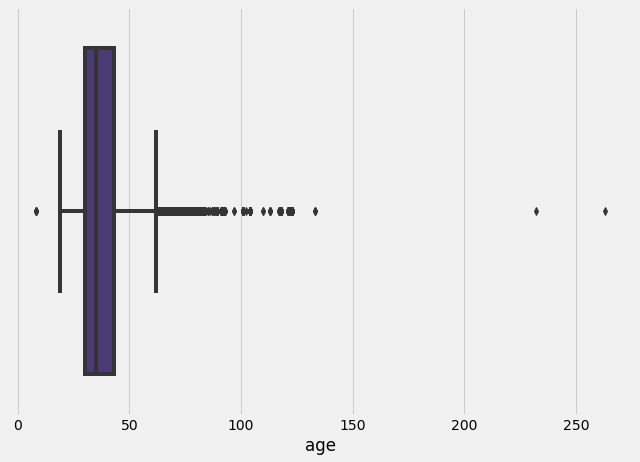

In [20]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='age', data=df)
plt.show();

- From the above plot we can see that we have a couple of records wherein the age of the user is above 200 and a few whos age is above 100.
- *We will be removing records where the age of the user is above 90 at the time of the ride.*

In [21]:
# number of users with age above 90 at the time of the ride
df[df['year'] - df['birthyear'] > 90].shape

(988, 22)

In [22]:
# removing the records
df = df[df['year'] - df['birthyear'] <= 90]

In [23]:
print(df.shape)

(3257800, 22)


***There are certain stations which are meant for testing only, we can remove those as well:***

In [106]:
# removing testing stations from 'from_station_name'
df = df.loc[~df['from_station_name'].str.contains("TEST", case=False)]

In [107]:
# removing testing stations from 'to_station_name'
df = df.loc[~df['to_station_name'].str.contains("TEST", case=False)]

In [108]:
print(df.shape)

(3225189, 22)


## Analyzing the Data (EDA)

In [24]:
# looking at the columns
df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear',
       'tripduration_minutes', 'year', 'month', 'day', 'day_of_month',
       'quarter', 'is_weekend', 'age', 'period', 'hour_of_day'],
      dtype='object')

In [25]:
# creating a sample of the dataframe
df_sample = df.sample(100000, random_state=42)

***Trip Duration distribution and outliers:***

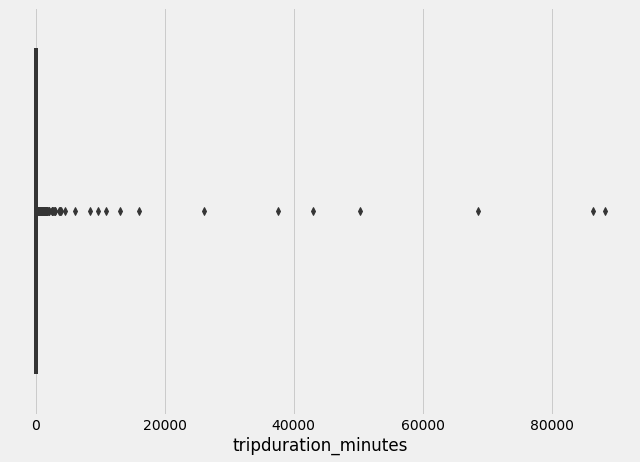

In [26]:
# let's look at the distribution
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_sample, x='tripduration_minutes')
plt.show();

In [27]:
# Let's look at the mean, max and minimum value of tripduration
df[['tripduration', 'tripduration_minutes']].describe()

,tripduration,tripduration_minutes
count,3257800.000000,3257800.000000
mean,1071.170045,17.852834
std,20775.728047,346.262134
min,61.000000,1.016667
25%,380.000000,6.333333
50%,631.000000,10.516667
75%,1076.000000,17.933333
max,9056634.000000,150943.900000


- From above plot and statistical summary we can see that the `tripduration` has outliers present.
    - It is highly unlikely for a trip to last for 150943 minutes (~2515 hrs).
- Let's take a look at IQR as well as the percentiles:

In [28]:
# calculating the IQR
q1, q3 = np.percentile(df.tripduration_minutes.values, q=[25, 75])
print(f"Q1 or 25th percentile: {q1:.2f} minutes")
print(f"Q3 or 75th percentile: {q3:.2f} minutes")

Q1 or 25th percentile: 6.33 minutes
Q3 or 75th percentile: 17.93 minutes


In [29]:
IQR = q3 - q1

lower_bound = q1 - (IQR * 3)
upper_bound = q3 + (IQR * 3)
print(f'Value below {lower_bound:.3f} and above {upper_bound:.3f} can be considered as outliers.')

Value below -28.467 and above 52.733 can be considered as outliers.


In [30]:
# calculating the values at percentiles
for i in range(0, 100, 10):
    ith_percentile = np.percentile(df.tripduration_minutes.values, q=i)
    print(f'{i}th percentile value --- {ith_percentile:.3f}')

0th percentile value --- 1.017
10th percentile value --- 4.133
20th percentile value --- 5.617
30th percentile value --- 7.083
40th percentile value --- 8.683
50th percentile value --- 10.517
60th percentile value --- 12.800
70th percentile value --- 15.883
80th percentile value --- 20.517
90th percentile value --- 28.600


In [31]:
# calculating 90th to 99th percentiles
for i in range(90, 100):
    ith_percentile = np.percentile(df.tripduration_minutes.values, q=i)
    print(f'{i}th percentile value --- {ith_percentile:.3f}')

90th percentile value --- 28.600
91th percentile value --- 29.800
92th percentile value --- 31.200
93th percentile value --- 32.867
94th percentile value --- 34.867
95th percentile value --- 37.367
96th percentile value --- 40.767
97th percentile value --- 46.283
98th percentile value --- 58.033
99th percentile value --- 86.500


- From the above data, we can infer that 99 percent of the values have `tripduration` under 86.5 minutes.

**We will remove the records with `tripduration` above the 99th percentile i.e. 86.5 minutes.**

In [32]:
df = df[df.tripduration_minutes <= 86.500]
df.shape

(3225228, 22)

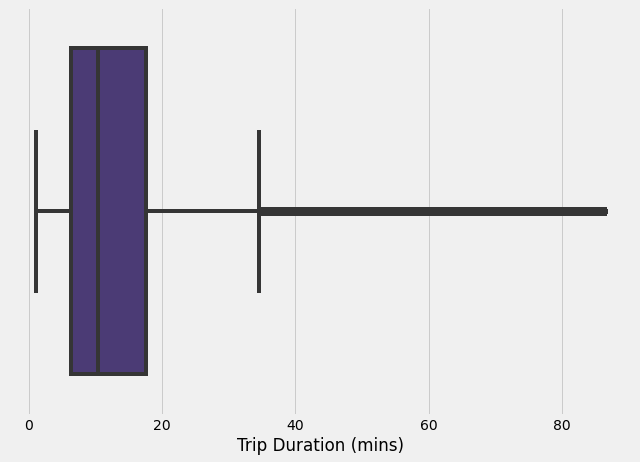

In [33]:
# plotting the boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='tripduration_minutes')
plt.xlabel('Trip Duration (mins)')
plt.show();

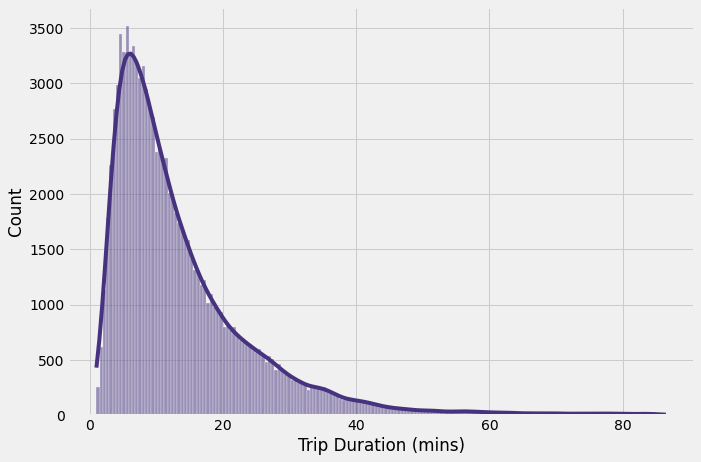

In [34]:
# let's look into the distribution
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=df.sample(100000, random_state=42), x='tripduration_minutes', kde=True, ax=ax)
plt.xlabel('Trip Duration (mins)')
plt.show();

**Looking into the Trip Durations of Customer Types:**

In [35]:
df.groupby('usertype')['tripduration_minutes'].agg(['count', 'mean', 'median'])

,count,mean,median
usertype,,,
Customer,317460,26.183230,21.383333
Subscriber,2907768,12.415792,9.783333


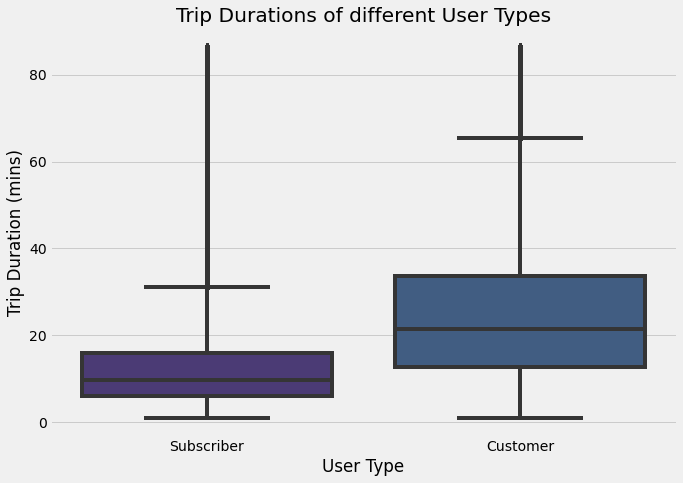

In [36]:
# boxplot of different usertypes
plt.figure(figsize=(10, 7))
sns.boxplot(x='usertype', y='tripduration_minutes', data=df);
plt.title('Trip Durations of different User Types')
plt.ylabel('Trip Duration (mins)')
plt.xlabel('User Type')
plt.show();

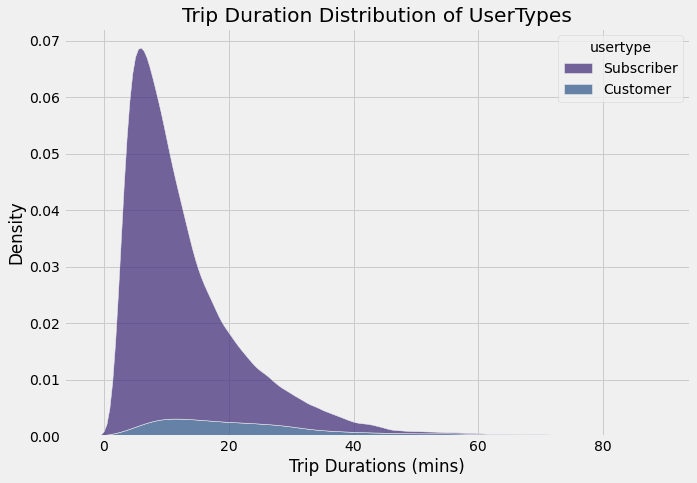

In [110]:
# kde of usertypes with tripduration
plt.figure(figsize=(10, 7))
sns.kdeplot(
    x='tripduration_minutes', hue='usertype', 
    data=df.sample(200000, random_state=42),
    multiple='stack'
)
plt.title('Trip Duration Distribution of UserTypes')
plt.xlabel('Trip Durations (mins)')
plt.show();

- Average Trip Duration of `Subscriber`: 12.41 minutes.
- Average Trip Duration of `Customer`: 26.18 minutes.

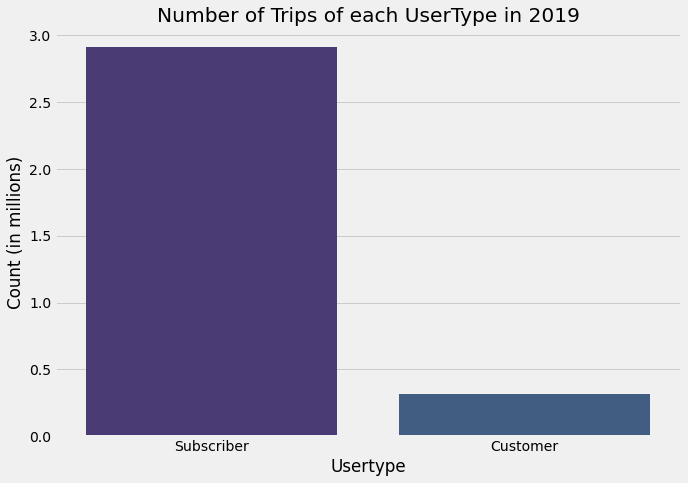

In [38]:
# plotting number of trips of different usertypes
def millions_formatter(x, pos):
    return f'{x / 1000000}'


fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x='usertype', data=df)
plt.title('Number of Trips of each UserType in 2019')
plt.xlabel('Usertype')
plt.ylabel('Count (in millions)')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show();

***Trip Duration on Different Days of the Week:***

In [39]:
# grouping by day of the week
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby(['day'])['tripduration_minutes'].agg(['mean', 'median', 'count']).reindex(weekdays)

,mean,median,count
day,,,
Monday,13.216747,10.100000,491862
Tuesday,12.905142,10.000000,526263
Wednesday,12.942308,10.066667,524160
Thursday,13.038865,10.050000,520542
Friday,13.233443,10.050000,496044
Saturday,16.757650,12.416667,355241
Sunday,16.179063,12.066667,311116


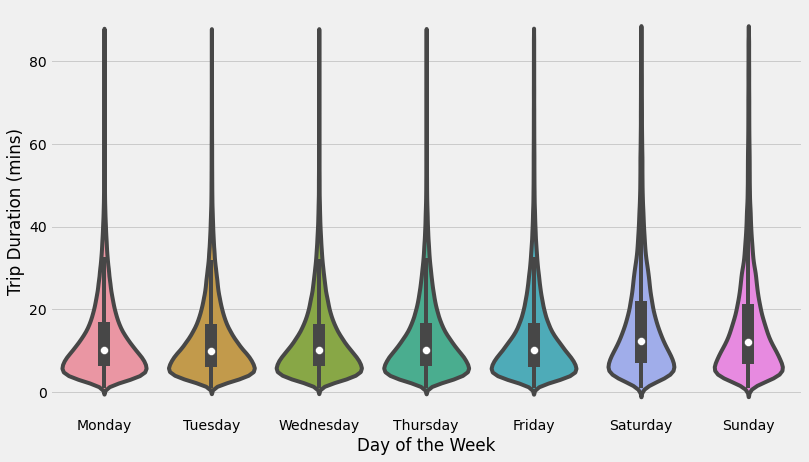

In [40]:
# boxplot of days of week
plt.figure(figsize=(12, 7))
sns.violinplot(x='day', y='tripduration_minutes', data=df, order=weekdays)
plt.xlabel('Day of the Week')
plt.ylabel('Trip Duration (mins)')
plt.show();

- From the above plot, we see that the **average trip duration** on **Weekdays** is lower than that on **Weekends**.

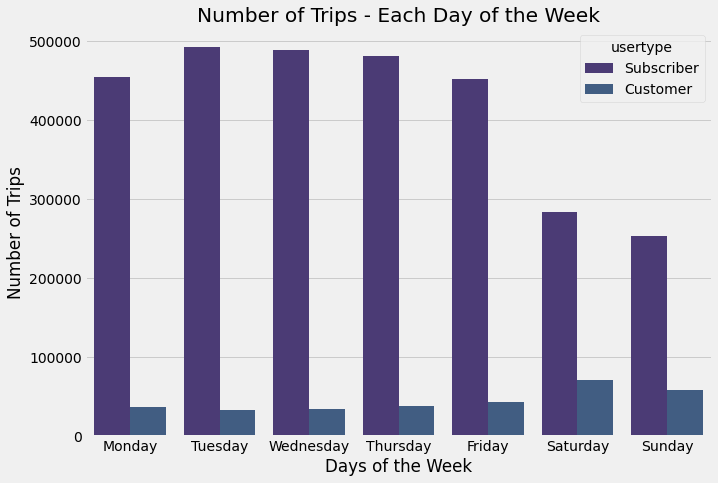

In [109]:
# plotting the number of rides on weekdays and weekends
plt.figure(figsize=(10, 7))
sns.countplot(x='day', hue='usertype', data=df, order=weekdays)
plt.xlabel('Days of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips - Each Day of the Week')
plt.show();

- **From the above plot we can see that the Customer usertype has more number of trips during the weekend.**
    - This can be because mostly Subscribers use the bike service for commute to work, and many of those who haven't subscribed use the bikes for leisure.

***Trips in different Months***

In [42]:
# info about trips in different months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
df.groupby('month')['tripduration_minutes'].agg(['mean', 'median', 'count']).reindex(months)

,mean,median,count
month,,,
January,10.671485,8.350000,98771
February,10.333039,8.100000,93146
March,11.182844,8.616667,152070
April,12.852081,9.766667,227674
May,13.785794,10.466667,304829
June,14.813903,11.416667,381426
July,15.938295,12.200000,446174
August,15.544455,11.900000,475322
September,14.320768,10.933333,411959


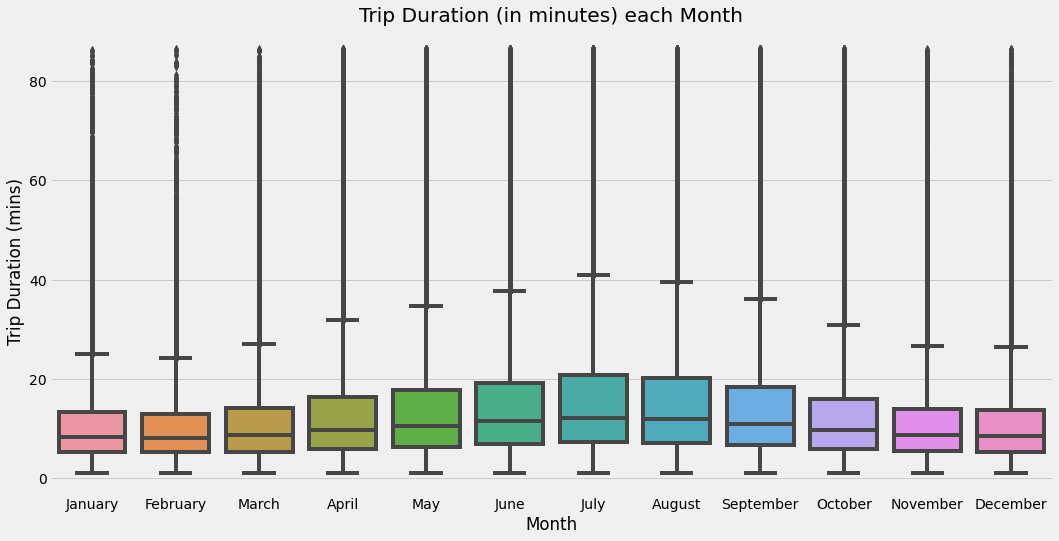

In [43]:
# plotting distribution of trips in each month
plt.figure(figsize=(16, 8))
sns.boxplot(x='month', y='tripduration_minutes', data=df, order=months)
plt.xlabel('Month')
plt.ylabel('Trip Duration (mins)')
plt.title('Trip Duration (in minutes) each Month')
plt.show();

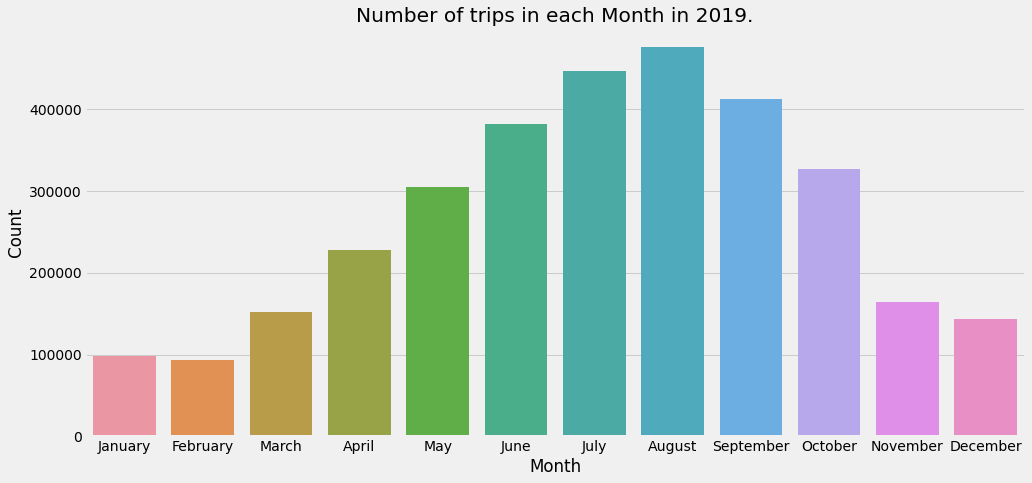

In [44]:
# plotting number of trips each month
plt.figure(figsize=(15, 7))
sns.countplot(x='month', data=df, order=months)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of trips in each Month in 2019.')
plt.show();

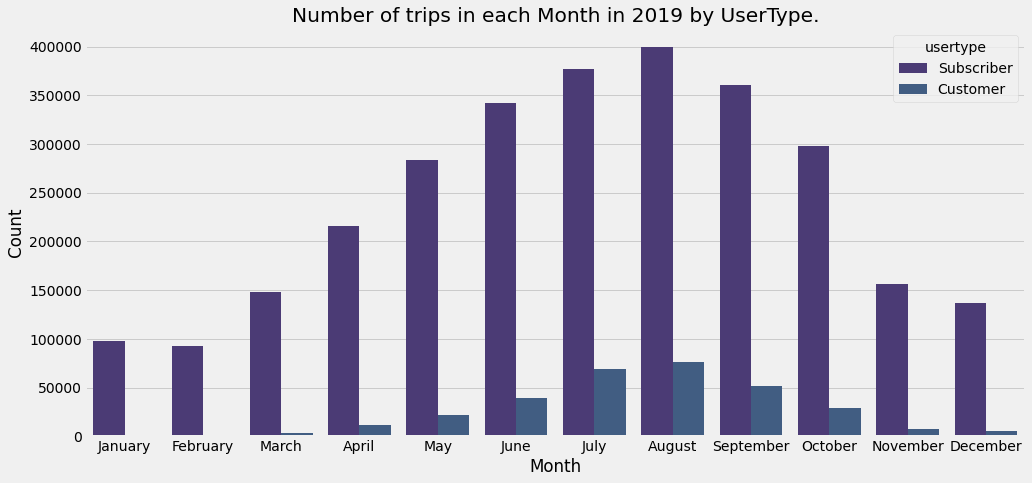

In [112]:
# plotting number of trips each month
plt.figure(figsize=(15, 7))
sns.countplot(x='month', data=df, hue='usertype', order=months)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of trips in each Month in 2019 by UserType.')
plt.show();

- From the above plots, we can see that in July, August and September, the number of Trips are the greatest.
- February, January and December are the months with the least amount of trips.

***Trip Information each Quarter***

In [45]:
df.groupby('quarter')['tripduration_minutes'].agg(['mean', 'median', 'count'])

,mean,median,count
quarter,,,
1,10.805902,8.383333,343987
2,13.982270,10.666667,913929
3,15.298187,11.683333,1333455
4,11.862353,9.100000,633857


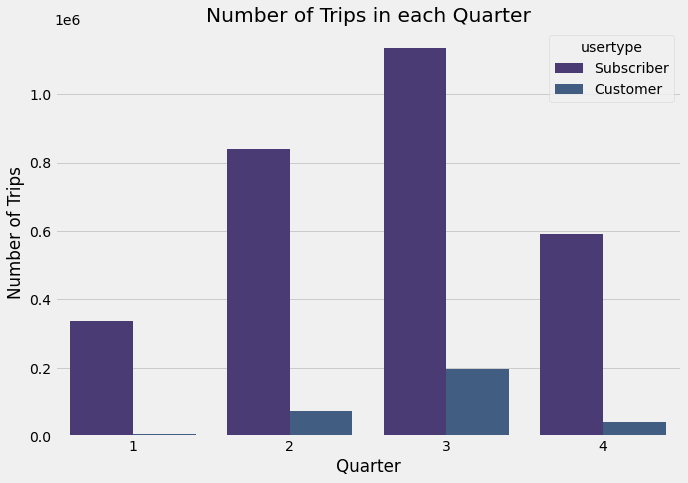

In [111]:
# plotting number of trips in each quarter
plt.figure(figsize=(10, 7))
sns.countplot(x='quarter', hue='usertype', data=df)
plt.xlabel('Quarter')
plt.ylabel('Number of Trips')
plt.title('Number of Trips in each Quarter')
plt.show();

***Checking the Trip information by Part of the Day - Morning, Evening, Night etc.***

In [47]:
# getting the info
part_of_day = ['early morning', 'morning', 'afternoon', 'evening', 'night', 'late night']

df.groupby('period')['tripduration_minutes'].agg(['count', 'mean', 'median']).reindex(part_of_day)

,count,mean,median
period,,,
early morning,375722,11.533956,9.100000
morning,690711,13.109730,9.916667
afternoon,654887,15.072877,10.750000
evening,1187177,14.127335,10.966667
night,278338,13.928449,10.850000
late night,38393,13.186784,9.883333


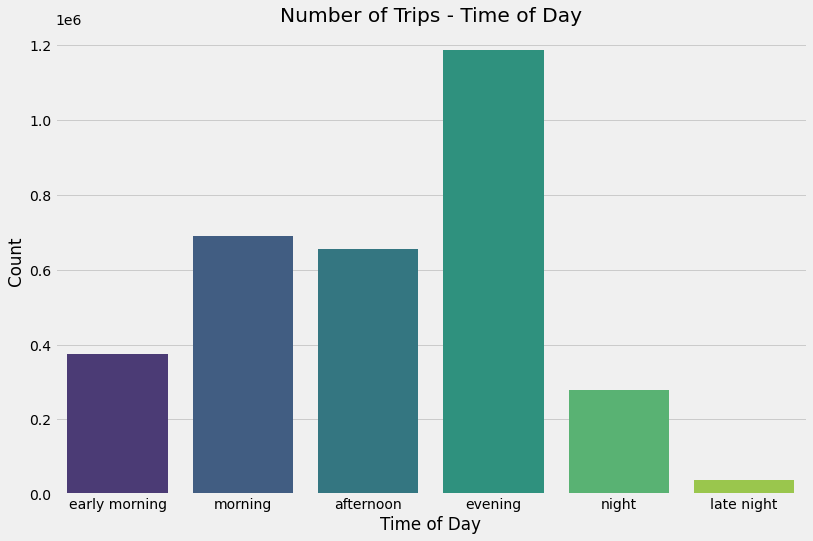

In [48]:
# let's see the count of trips during part of day:
plt.figure(figsize=(12, 8))
sns.countplot(x='period', data=df, order=part_of_day)
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.title('Number of Trips - Time of Day')
plt.show();

- From the above plot, we can see that people generally use the Bikes in the Evening.
- Least amount of trips are in Late Night.

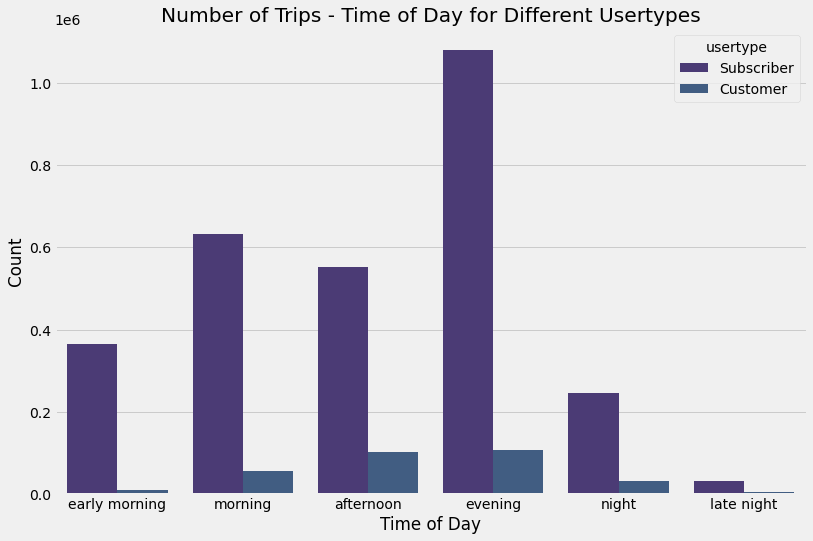

In [49]:
# let's see the count of trips during part of day by usertype:
plt.figure(figsize=(12, 8))
sns.countplot(x='period', hue='usertype', data=df, order=part_of_day)
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.title('Number of Trips - Time of Day for Different Usertypes')
plt.show();

- **From the above plot, we can see that the customer usertype has higher number of trips during the afternoon and evening time, so to target the customers that have not yet subscribed to the company we can target them during the afternoon and evening.**

In [50]:
# number of trips each day of the year
temp = df[['start_time', 'tripduration_minutes']]
temp['date'] = temp['start_time'].dt.date

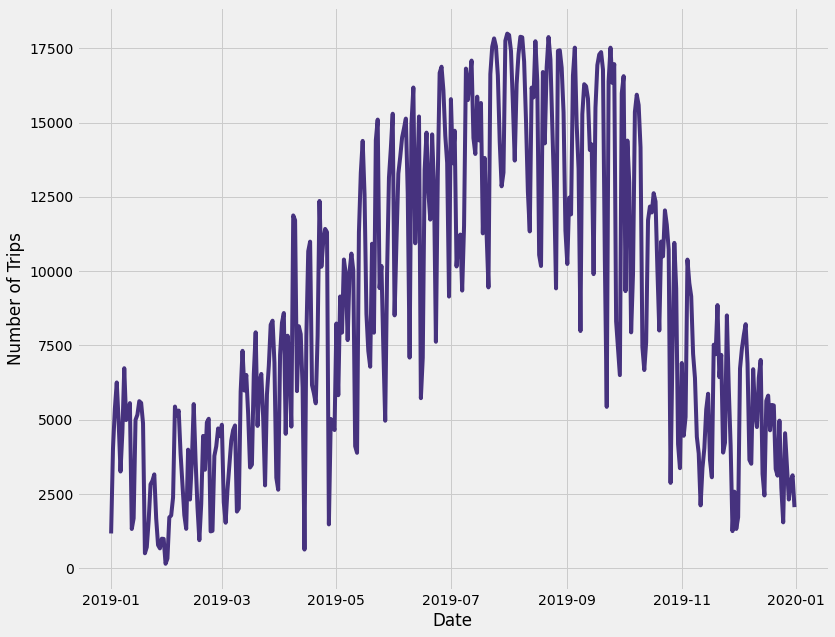

In [51]:
# plotting time-series with number of trips
plt.figure(figsize=(12, 10))
temp.groupby('date')['tripduration_minutes'].count().plot()
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show();

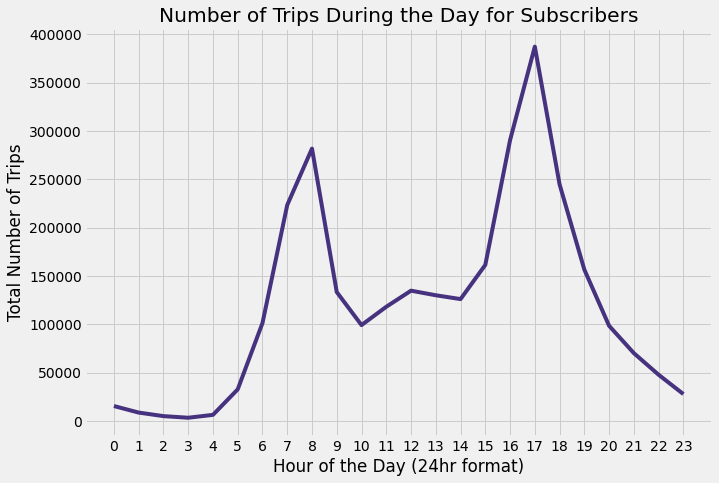

In [116]:
# number of trips during hour of the day
plt.figure(figsize=(10, 7))
df[df.usertype == 'Subscriber'].groupby('hour_of_day')['tripduration_minutes'].count().plot(kind='line', label='Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.xlabel('Hour of the Day (24hr format)')
plt.ylabel('Total Number of Trips')
plt.title('Number of Trips During the Day for Subscribers')
plt.show();

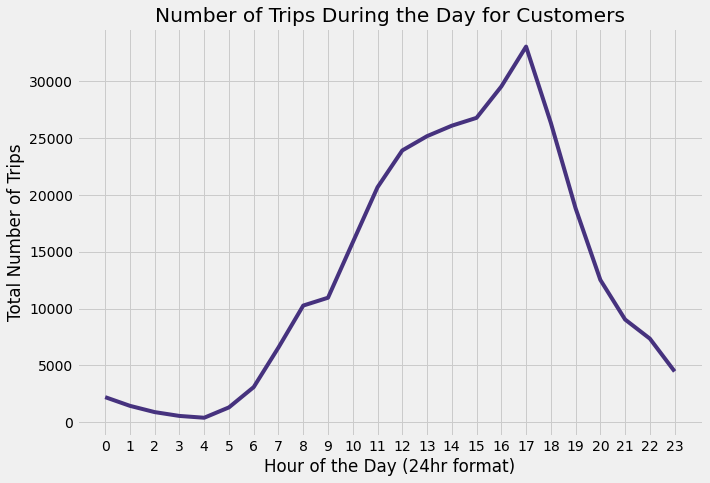

In [117]:
plt.figure(figsize=(10, 7))
df[df.usertype == 'Customer'].groupby('hour_of_day')['tripduration_minutes'].count().plot(kind='line', label='Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.xlabel('Hour of the Day (24hr format)')
plt.ylabel('Total Number of Trips')
plt.title('Number of Trips During the Day for Customers')
plt.show();

- From above we can see that the busiest periods during the day are between `7am to 9am` and `4pm to 6pm` for `Subscribers`, which suggest that mostly Subscribers use the bikes for commute to work.
- Whereas for `Customers`, we can see  from `9am to 8pm` with the most at around `5pm`. 

***Usertype Information:***

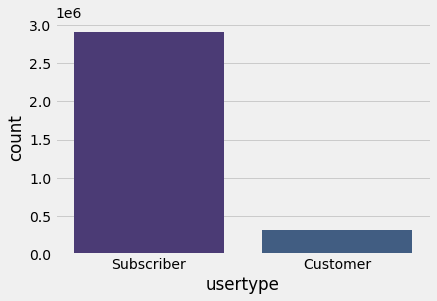

In [53]:
# counting number of usertypes
plt.figure()
sns.countplot(x='usertype', data=df)
plt.show();

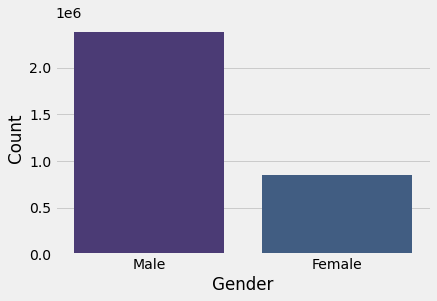

Male      2380571
Female     844657
Name: gender, dtype: int64


In [54]:
# finding the gender information
plt.figure()
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

print(df['gender'].value_counts())

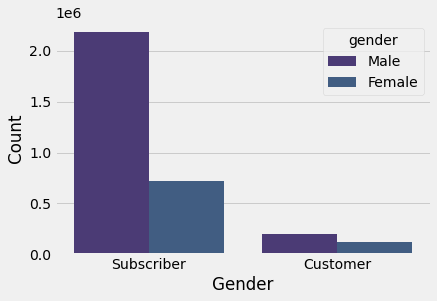

In [55]:
# finding gender information on usertype
plt.figure()
sns.countplot(x='usertype', hue='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

In [56]:
gender_distribution = df.groupby(['usertype', 'gender'])['trip_id'].count()
gender_distribution

usertype    gender
Customer    Female     119850
            Male       197610
Subscriber  Female     724807
            Male      2182961
Name: trip_id, dtype: int64

In [57]:
# Getting the Female to Male Ratio
customer_gender_ratio = gender_distribution.iloc[0] / gender_distribution.iloc[1]
subscriber_gender_ratio = gender_distribution.iloc[2] / gender_distribution.iloc[3]

print(f'Female to Male ratio in Customers: {customer_gender_ratio:.3f}')
print(f'Female to Male ratio in Subscribers: {subscriber_gender_ratio:.3f}')

Female to Male ratio in Customers: 0.606
Female to Male ratio in Subscribers: 0.332


- From the above data we can see that the disparity between male and female is greater in Subscribers than in Customers.
    - Meaning difference between Male and Female is greater in Subscribers, 66% more males than females.

***Usertype and Age:***

In [119]:
df.groupby('usertype')['age'].agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
usertype,,,,
Customer,33.666652,31.000000,91.000000,19.000000
Subscriber,38.361245,35.000000,93.000000,8.000000


- From the above data, we can see that:
    - Average Customer is on an average 33 years old
    - Average Subscriber is on an average 38 years old.
    - Minimum age of Customer is 19
    - Minimum age of Subscribers is 8
       - We can target younger people, mainly children and teenagers and convert them to subscribers, as we see that minimum age of a Customer is 19.

***Finding Most Popular Stations***

In [59]:
# getting subscribers and cusotmers
df_subscribers = df[df['usertype'] == 'Subscriber']
df_customers = df[df['usertype'] == 'Customer']

print(f'Subscribers: {df_subscribers.shape}, Customers: {df_customers.shape}')

Subscribers: (2907768, 22), Customers: (317460, 22)


In [60]:
df_subscribers.head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,tripduration_minutes,year,month,day,day_of_month,quarter,is_weekend,age,period,hour_of_day
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.000000,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,...,6.500000,2019,January,Tuesday,1,1,0,33.000000,late night,0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.000000,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,...,7.350000,2019,January,Tuesday,1,1,0,32.000000,late night,0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.000000,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,...,13.816667,2019,January,Tuesday,1,1,0,28.000000,late night,0


In [61]:
df_customers.head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,tripduration_minutes,year,month,day,day_of_month,quarter,is_weekend,age,period,hour_of_day
13,21742456,2019-01-01 00:23:43,2019-01-01 00:33:05,84,562.000000,90,Millennium Park,255,Indiana Ave & Roosevelt Rd,Customer,...,9.366667,2019,January,Tuesday,1,1,0,32.000000,late night,0
17,21742460,2019-01-01 00:24:27,2019-01-01 00:47:03,5777,1356.000000,268,Lake Shore Dr & North Blvd,319,Greenview Ave & Diversey Pkwy,Customer,...,22.600000,2019,January,Tuesday,1,1,0,32.000000,late night,0
41,21742487,2019-01-01 01:02:54,2019-01-01 01:22:01,368,1147.000000,636,Orleans St & Hubbard St (*),214,Damen Ave & Grand Ave,Customer,...,19.116667,2019,January,Tuesday,1,1,0,34.000000,late night,1


***Finding Stations with most number of trips started and ended:***

**Customers:**

In [73]:
print("Top 10 Stations where Customers start their rides:")
df_customers.groupby('from_station_name')['trip_id'].count().sort_values(ascending=False)[:10]

Top 10 Stations where Customers start their rides:


from_station_name
Streeter Dr & Grand Ave         14814
Lake Shore Dr & Monroe St        9113
Lake Shore Dr & North Blvd       6334
Michigan Ave & Oak St            6279
Millennium Park                  5577
Theater on the Lake              4888
Shedd Aquarium                   4746
Michigan Ave & Washington St     3644
Adler Planetarium                3213
Dusable Harbor                   2955
Name: trip_id, dtype: int64

In [75]:
print("Top 10 Stations where Customers end their rides:")
df_customers.groupby('to_station_name')['trip_id'].count().sort_values(ascending=False)[:10]

Top 10 Stations where Customers end their rides:


to_station_name
Streeter Dr & Grand Ave         17704
Lake Shore Dr & North Blvd       8389
Lake Shore Dr & Monroe St        7496
Michigan Ave & Oak St            7100
Millennium Park                  6686
Theater on the Lake              6352
Shedd Aquarium                   4592
Michigan Ave & Washington St     3722
Adler Planetarium                3025
Clark St & Armitage Ave          2899
Name: trip_id, dtype: int64

**Subscribers:**

In [76]:
print("Top 10 stations where Subscribers start their rides:")
df_subscribers.groupby('from_station_name')['trip_id'].count().sort_values(ascending=False)[:10]

Top 10 stations where Subscribers start their rides:


from_station_name
Canal St & Adams St             50468
Clinton St & Madison St         45542
Clinton St & Washington Blvd    45061
Columbus Dr & Randolph St       31054
Franklin St & Monroe St         30705
Kingsbury St & Kinzie St        30414
Daley Center Plaza              30239
Canal St & Madison St           26959
Michigan Ave & Washington St    25225
LaSalle St & Jackson Blvd       22935
Name: trip_id, dtype: int64

In [78]:
print("Top 10 stations where Subscribers end their rides:")
df_subscribers.groupby('to_station_name')['trip_id'].count().sort_values(ascending=False)[:10]

Top 10 stations where Subscribers end their rides:


to_station_name
Clinton St & Washington Blvd    47855
Canal St & Adams St             47217
Clinton St & Madison St         43923
Daley Center Plaza              30467
Kingsbury St & Kinzie St        29827
Michigan Ave & Washington St    27803
Franklin St & Monroe St         26688
Canal St & Madison St           26233
Clark St & Elm St               22503
LaSalle St & Jackson Blvd       21963
Name: trip_id, dtype: int64

- From the above information, we observe that subscribers and customers start and end their rides on different stations.
- For customers, majority of the rides have started and ended on the following stations:
        - Streeter Dr & Grand Ave         
        - Lake Shore Dr & Monroe St       
        - Lake Shore Dr & North Blvd       
        - Michigan Ave & Oak St           
        - Millennium Park                  
        - Theater on the Lake             
        - Shedd Aquarium                

***Let's check stations for Customers with the highest tripdurations:***

In [87]:
top_10_stations_tripduration = df_customers.groupby('from_station_name')['tripduration_minutes'].sum().sort_values(ascending=False)[:10]
top_10_stations_tripduration

from_station_name
Streeter Dr & Grand Ave        477469.700000
Lake Shore Dr & Monroe St      306478.366667
Michigan Ave & Oak St          211730.783333
Millennium Park                185239.866667
Lake Shore Dr & North Blvd     172015.750000
Shedd Aquarium                 139756.266667
Theater on the Lake            137173.766667
Michigan Ave & Washington St   115993.633333
Adler Planetarium               97788.733333
Dusable Harbor                  92580.616667
Name: tripduration_minutes, dtype: float64

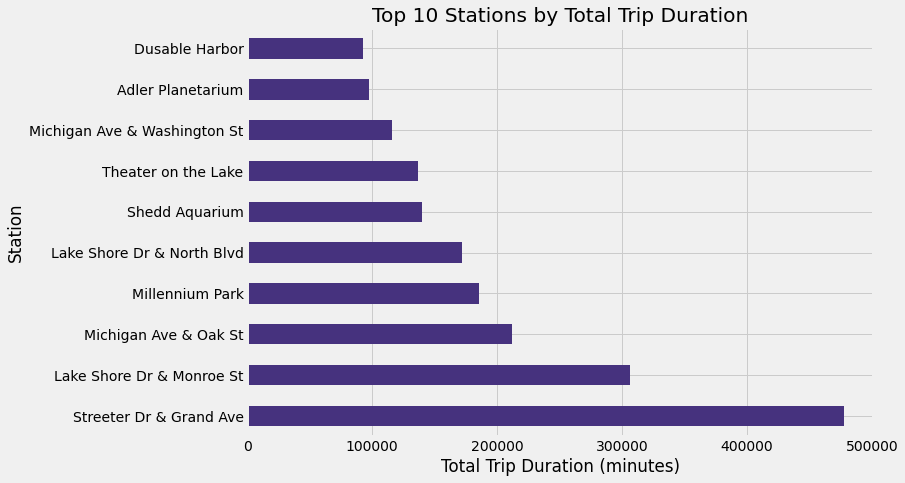

In [89]:
plt.figure(figsize=(10, 7))
top_10_stations_tripduration.plot(kind='barh')
plt.ylabel('Station')
plt.xlabel('Total Trip Duration (minutes)')
plt.title('Top 10 Stations by Total Trip Duration')
plt.show();

## Recommendations


***The recommendations that I would like to propose based on the above findings are as follows:***
- Based on the trips made, we can start the marketing campaigns and advertisements from Febraury till the month of November as the number of trips made by Customers are relatively higher in these months.
- As we observed that Customers ridership often peak at the weekends, so the company can start a Weekend Exclusive subscriptions at a lower price to convert Customers into Subscribers.
- I also obversed that the minimum age of Customers is 19 whereas Subscribers are as low as 8 years old, so the company can launch a program or subcription targetting school going kids and teenagers.
- The Marketing team can target the above mentioned stations more frequently and focus on these stations as a huge number of Customers visit and start their trips from these stations.
- Promoting cycling as a means of their fitness as well as for the well being of our planet - encouraging Customers to start commuting to work on bikes as most of the Subcribers do so.
- We can also share a couple of Stories of Subscribers, who often use bikes to travel to work, on how cycling to work helped them beat the traffic as well as stay fit.